In [42]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

In [43]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re

from IPython.display import display, display_html, HTML
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

import Jupyter_module_loader
from utility import *
import gaussian_kde

# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()


global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

max_wave, num_to_wave, num_to_weight, weights = get_weights(dataset_name,BES_Panel)

var_type (5692, 13)


In [3]:
BES_reduced_with_na["amalgamated_enviroprotection"] = amalgamate_waves(BES_reduced_with_na,"enviroProtection")
BES_reduced_with_na["amalgamated_enviroGrowth"] = amalgamate_waves(BES_reduced_with_na,"enviroGrowth")
BES_reduced_with_na["amalgamated_climateChange"] = amalgamate_waves(BES_reduced_with_na,"climateChange")

Amalgamating variables: 
{1: 'enviroProtectionW1__Gone much too far', 2: 'enviroProtectionW2__Gone much too far', 3: 'enviroProtectionW3__Gone much too far', 4: 'enviroProtectionW4__Gone much too far', 6: 'enviroProtectionW6__Gone much too far', 7: 'enviroProtectionW7__Gone much too far', 12: 'enviroProtectionW12__Gone much too far', 14: 'enviroProtectionW14__Gone much too far'}
Amalgamating variables: 
{4: 'enviroGrowthW4__Protecting the environment should have priority', 7: 'enviroGrowthW7__Protecting the environment should have priority'}
Amalgamating variables: 
{7: 'climateChangeW7__Climate not changing', 10: 'climateChangeW10__Climate not changing', 11: 'climateChangeW11__Climate not changing'}


In [4]:
pattern = "climateChange|amalgamated"
name = "amalgamated_climateChange"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,r,p,N
enviroProtectionW3__Gone much too far,0.47,0.00,12066
euExpRefW7_To leave the European Union,0.37,0.00,3357
likeNuttallW10__Strongly like,0.37,0.00,10735
happyEULeaveW14__Extremely happy,0.37,0.00,16883
ptvUKIPW8__Very likely,0.37,0.00,4000
euIDW13_The leave side,0.36,0.00,19118
happyLeaveW7__Very happy,0.36,0.00,3630
EUIntegrationSelfW11__Protect our independence,0.36,0.00,20602
likeUKIPW10__Strongly like,0.35,0.00,25493
happyTrumpW10__Extremely happy,0.35,0.00,25656


In [5]:
pattern = "enviroGrowth|amalgamated"
name = "amalgamated_enviroGrowth"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)

,r,p,N
ptvGrnW3__Very likely,0.47,0.00,11197
likeGrnW12__Strongly like,0.46,0.00,19668
likeLucasW12__Strongly like,0.42,0.00,15642
spendLeast6W3_Defence,0.42,0.00,3906
spendLeast3W3_Defence,0.41,0.00,3891
likeBennettW4__Strongly like,0.4,0.00,19358
grnGovTrustW5__ Would do a good job,0.4,0.00,25695
handleMIIGrnW7__Very well,0.39,0.00,4920
competentLucasW10__A great deal of competence,0.39,0.00,2435
bestPMW8_Jeremy Corbyn,0.38,0.00,12447


In [7]:
pattern = "enviroProtection|amalgamated"
name = "amalgamated_enviroprotection"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)

,r,p,N
spendLeast3W3_Environmental Policy,0.47,0.00,4618
spendLeast6W3_Environmental Policy,0.42,0.00,4629
leftRightW9__Right,0.42,0.00,5839
climateChangeW11__Climate not changing,0.42,0.00,6464
likeNuttallW10__Strongly like,0.4,0.00,10489
euPriorityBalanceW12__Control immigration,0.38,0.00,30581
handleMIIConW12__Very well,0.38,0.00,6913
overseasAidW12__Strongly agree,0.38,0.00,8336
handleEUNegotiateW12__Very well,0.38,0.00,31098
generalElectionVoteUnsqueezeW12_Conservative,0.38,0.00,20591


In [ ]:
## all associated variables are political
# some directly related to the environment (Green Party), a lot not at related (Brexit/immigration!)

# Only other "directly environment related variables": spendLeast3W3_Environmental Policy
# only spendLeast connected, not spendMost!

In [15]:
spendMostEnvironmentalPolicyMean = BES_reduced_with_na[search(BES_reduced_with_na,"spendMost\dW\d_Environmental Policy").index].mean(axis=1)
BES_reduced_with_na["spendMostEnvironmentalPolicyMean"] = spendMostEnvironmentalPolicyMean
search(BES_reduced_with_na,"spendMost\dW\d_Environmental Policy")

spendMost1W2_Environmental Policy    10498
spendMost3W2_Environmental Policy    10500
spendMost4W2_Environmental Policy    10440
spendMost6W2_Environmental Policy    10371
spendMost1W3_Environmental Policy     4858
spendMost3W3_Environmental Policy     4883
spendMost4W3_Environmental Policy     4830
spendMost6W3_Environmental Policy     4829
dtype: int64

In [16]:
spendLeastEnvironmentalPolicyMean = BES_reduced_with_na[search(BES_reduced_with_na,"spendLeast\dW\d_Environmental Policy").index].mean(axis=1)
BES_reduced_with_na["spendLeastEnvironmentalPolicyMean"] = spendLeastEnvironmentalPolicyMean
search(BES_reduced_with_na,"spendLeast\dW\d_Environmental Policy")

spendLeast1W2_Environmental Policy     9183
spendLeast3W2_Environmental Policy     9716
spendLeast4W2_Environmental Policy    10002
spendLeast6W2_Environmental Policy     9850
spendLeast1W3_Environmental Policy     4189
spendLeast3W3_Environmental Policy     4643
spendLeast4W3_Environmental Policy     4565
spendLeast6W3_Environmental Policy     4654
dtype: int64

In [19]:
pattern = "spendMost|spendLeast|amalgamated"
name = "spendMostEnvironmentalPolicyMean"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)

,r,p,N
enviroGrowthW4__Protecting the environment should[...],0.34,0.00,10096
ptvGrnW12__Very likely,0.33,0.00,1081
small_mii_catW2_Environment,0.32,0.00,10947
miilabelW2_environment,0.32,0.00,9872
mii_catW12_environment,0.3,0.00,6474
euroElectionVoteW2_Green Party,0.27,0.00,9760
bestOnMIIW2_Green Party,0.27,0.00,10862
partyIdW9_Green Party,0.26,0.00,6897
localElectionVoteW7_Green Party,0.26,0.00,1743
handleMIIGrnW7__Very well,0.25,0.00,893


In [20]:
pattern = "spendMost|spendLeast|amalgamated"
name = "spendLeastEnvironmentalPolicyMean"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)

,r,p,N
enviroProtectionW3__Gone much too far,0.54,0.00,10760
leftRightW9__Right,0.41,0.00,1010
keepNukesW7__Strongly agree,0.37,0.00,7614
climateChangeW11__Climate not changing,0.35,0.00,2780
ptvConW12__Very likely,0.35,0.00,1084
generalElectionVoteUnsqueezeW12_Conservative,0.35,0.00,4415
likeMoggW14__Strongly like,0.34,0.00,698
likeDavisW13__Strongly like,0.33,0.00,1505
happyScotIndepResultNoW2__Extremely happy,0.32,0.00,4796
likeBorisW14__Strongly like,0.31,0.00,793


In [23]:
most_important_issue_environment = BES_reduced_with_na[search(BES_reduced_with_na,"_(e|E)nvironment$").index].mean(axis=1)
BES_reduced_with_na["most_important_issue_environment"] = most_important_issue_environment

search(BES_reduced_with_na,"_(e|E)nvironment$")

miilabelW1_environment              22760
miilabelW2_environment              22144
miilabelW3_environment              19537
miilabelW4_environment              24379
miilabelW5_environment              24833
miilabelW6_environment              22215
EUMIICategoryW7_environment         22599
EUMIICategoryW8_environment         16181
mii_catW5_environment               27900
mii_catW2_environment               26761
mii_catW4_environment               28194
mii_catW9_environment               27694
mii_catW7_environment               27731
mii_catW8_environment               30405
mii_catW1_environment               26674
mii_catW6_environment               27067
mii_catW11_environment              27583
mii_catW12_environment              31081
mii_catW13_environment              28414
mii_catW3_environment               24244
mii_catW10_environment              26282
small_mii_catW5_Environment         26770
small_mii_catW2_Environment         25088
small_mii_catW4_Environment       

In [24]:
pattern = "amalgamated|_(e|E)nvironment$"
name = "most_important_issue_environment"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)

,r,p,N
miilabelW1_flooding,0.67,0.00,22760
bestOnMIIW10_Green Party,0.33,0.00,22136
LRAL_mii_catW1_Lib-auth,0.3,0.00,24687
spendMost6W3_Environmental Policy,0.29,0.00,4791
spendMost3W2_Environmental Policy,0.28,0.00,10394
spendMost1W3_Environmental Policy,0.27,0.00,4822
spendMostEnvironmentalPolicyMean,0.27,0.00,13711
spendMost4W3_Environmental Policy,0.25,0.00,4791
partySiteGreenW4_Yes,0.21,0.00,4513
enviroGrowthW4__Protecting the environment should[...],0.21,0.00,28576


In [28]:
pattern = "miilabelW1_flooding|amalgamated|EnvironmentalPolicyMean"
name = "miilabelW1_flooding"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)

,r,p,N
small_mii_catW1_Environment,0.79,0.00,21187
mii_catW1_environment,0.79,0.00,22094
most_important_issue_environment,0.67,0.00,22760
LRAL_mii_catW1_Lib-auth,0.29,0.00,21187
bestOnMIIW1_No party is best able to handle this[...],0.15,0.00,19169
efficacyNotUnderstandW8__Strongly agree,0.11,0.00,1476
ldSupportW7__Mainly leave,0.1,0.00,10113
ldPriorities_immigW3_Yes,0.1,0.00,2858
gender_Female,0.09,0.00,22760
EUIntegrationGreenW14__Protect our independence,0.09,0.00,5544


In [150]:
# this is why we only see the first one!
BES_reduced_with_na[search(BES_reduced_with_na, "miilabelW\d_flooding").index].sum()

# ah - miilabel??_flooding is subcategory of mii_environment

miilabelW1_flooding    1224.0
miilabelW2_flooding       6.0
miilabelW4_flooding       1.0
miilabelW5_flooding       1.0
dtype: float32

In [29]:
Treatment = "ClimateChange"

output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [135]:
climateChange_text = "On the subject of climate change do you think..."
enviroProtection_text = "Do you think that measures to protect the environment have gone too far or not far enough?"
enviroGrowth_text = "Some believe that protecting the environment should have priority even if that reduces economic growth.\nOthers believe that economic growth should have priority even if that hinders protecting the environment.\nWhat is your opinion?"


# spendLeast/Most: "In your opinion, which one of the following areas should the government spend the *most* in and which area should the government spend the *least* in."

# mii_???: "As far as you're concerned, what is the SINGLE MOST important issue facing the country at the present time?""

# miilabelW1_flooding

In [62]:
amalgamated_enviroProtection = amalgamate_waves(BES_Panel,"enviroProtection")
amalgamated_enviroGrowth = amalgamate_waves(BES_Panel,"enviroGrowth")
amalgamated_climateChange = amalgamate_waves(BES_Panel,"climateChange")

Amalgamating variables: 
{1: 'enviroProtectionW1', 2: 'enviroProtectionW2', 3: 'enviroProtectionW3', 4: 'enviroProtectionW4', 6: 'enviroProtectionW6', 7: 'enviroProtectionW7', 12: 'enviroProtectionW12', 14: 'enviroProtectionW14'}
Amalgamating variables: 
{4: 'enviroGrowthW4', 7: 'enviroGrowthW7'}
Amalgamating variables: 
{7: 'climateChangeW7', 10: 'climateChangeW10', 11: 'climateChangeW11'}


In [101]:
def nice_bar_plot_one_var(ser2, output_folder, BES_Panel, normalize = 'columns', sort_labels=False,
                  text_width=8, text_fontsize=14, min_sample_size=100, title=None, drop_insig=True, fuckErrors=True,
                  mask=1, title_fontsize=14, ax=None, fig=None):
#     var1 = ser1.name
    
    if ax is None:
        soloplot = True
    else:
        soloplot = False
        
    ser1 = pd.Series(np.ones( df2.shape ))
    ser1.name = "dummy"
    var1="dummy"
    var2 = ser2.name
    
    mask = ser1.notnull() & ser2.notnull() & mask
    ct = pd.crosstab( ser1, ser2,
                      values= get_all_weights(mask, BES_Panel), aggfunc=sum, normalize=normalize)*100
    if sort_labels:
        sorted_labels = list(ser2.value_counts().index)
    else:
        sorted_labels = list(ser2.cat.categories)
           

    unweighted = pd.crosstab( ser1, ser2 )
    errors = 100 * np.sqrt(unweighted)/unweighted     

    labels_by_sample_size = {unweighted.sum().values[x]:sorted_labels[x]+" (N="+str(unweighted.sum().values[x])+")" for x in range(0,len(sorted_labels))}    
    labels_by_sample_size = {sorted_labels[x]+" (N="+str(unweighted.sum().values[x])+")":unweighted.sum().values[x] for x in range(0,len(sorted_labels))}    
    labels_restricted = [x for x in labels_by_sample_size.keys() if labels_by_sample_size[x] > min_sample_size] 
#     return labels_by_sample_size, labels_restricted
    if drop_insig:
        rubbish_entries = ct<errors
        ct[rubbish_entries]=np.nan
        errors[rubbish_entries]=np.nan
#     return(sorted_labels, errors, labels_by_sample_size)
    all_nan_rows = ~errors.isnull().any(axis=1)
    errors.columns = list( labels_by_sample_size.keys() )
   
    ct.columns = list( labels_by_sample_size.keys() )
    ct = ct.loc[all_nan_rows, labels_restricted]
#     return errors, labels_restricted
    errors = errors.loc[all_nan_rows, labels_restricted]
#     errors=errors.T
#     return errors
#     return errors, ct
    treatment = var2 +" by " + var1
    output_subfolder = create_subdir(output_folder, treatment)
    
    import textwrap 

    wrapper = textwrap.TextWrapper(width=text_width) 

    stacked = ct.stack().reset_index().rename(columns={0:'%',"level_1":var2})
    err_stacked = errors.stack().reset_index().rename(columns={0:'%',"level_1":var2})
    if ax is None:
        fig = plt.figure(figsize=(20, 8))
        ax = fig.subplots()


#     a = [np.ones(16),np.ones(16)]
#     a = errors.values
#     return a
#     iter(a)    
    
#     stacked[var1] = stacked[var1].apply( lambda x: x +" (N="+str(unweighted.sum(axis=1).loc[x])+")" )
#     stacked[var1].cat.set_categories(stacked[var1].cat.categories[all_nan_rows],inplace=True)
#     return stacked
#     return stacked['%'].shape,err_stacked["%"].values.reshape(len(stacked),1).shape
    if fuckErrors:
        sns.barplot(x = stacked[var2],
                    y = stacked['%'],
#                     hue = stacked[var1],
                    ax = ax, order = labels_restricted);
    else:
        sns.barplot(x = stacked[var2],
                    y = stacked['%'],
#                     hue = stacked[var1],
                    ax = ax, order = labels_restricted,
                    yerr = errors.values);        
                    # err_stacked["%"].values );
# .reshape(len(stacked),1)
    if title is None:
        title = var2
    ax.set_title(title, fontsize=title_fontsize)
    sorted_labels = [sorted_labels[x]+" (N="+str(unweighted.sum().values[x])+")" for x in range(0,len(sorted_labels))]
    ax.set_xticklabels([ wrapper.fill(text=x) for x in labels_restricted], rotation=0, fontsize=text_fontsize);

    if soloplot:
    
        ax.annotate(dataset_citation, (0,0), (0, -140),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ;           
        fname = output_subfolder + clean_filename(title) + ".png"
        fig.savefig( fname, bbox_inches='tight' )   

Warning, filename truncated because it was over 30. Filenames may no longer be unique


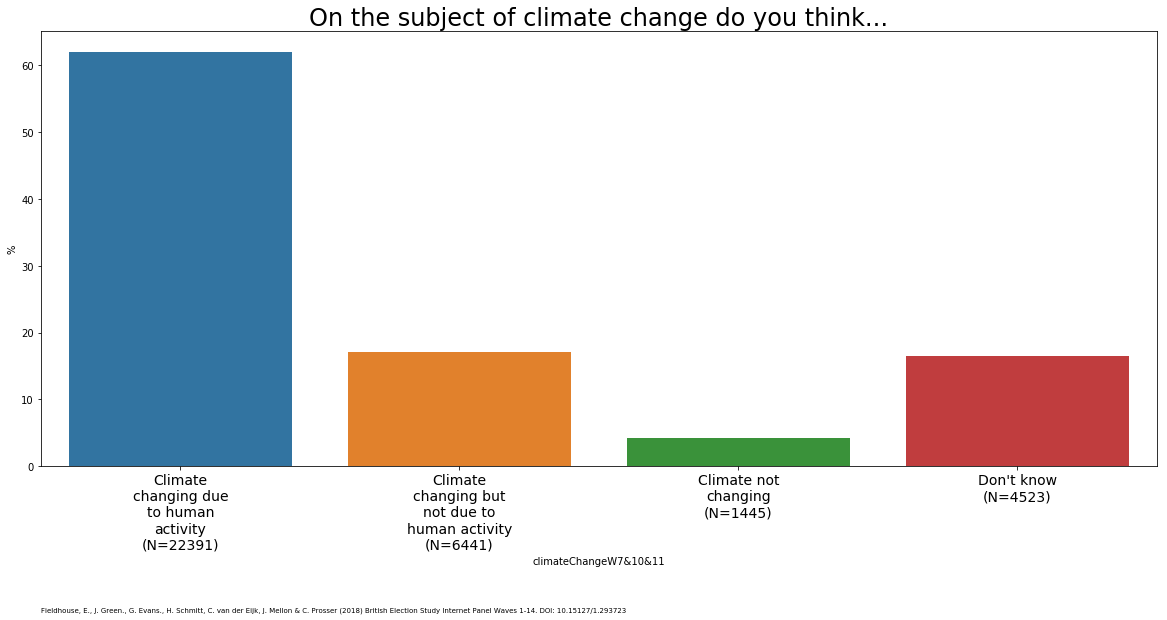

In [136]:
df2 = amalgamated_climateChange
nice_bar_plot_one_var(df2, output_folder=output_subfolder,BES_Panel=BES_Panel,
              min_sample_size=1, normalize='all',drop_insig=False,
              text_width = 14,
              title_fontsize=24,
              title=climateChange_text)

Warning, filename truncated because it was over 30. Filenames may no longer be unique


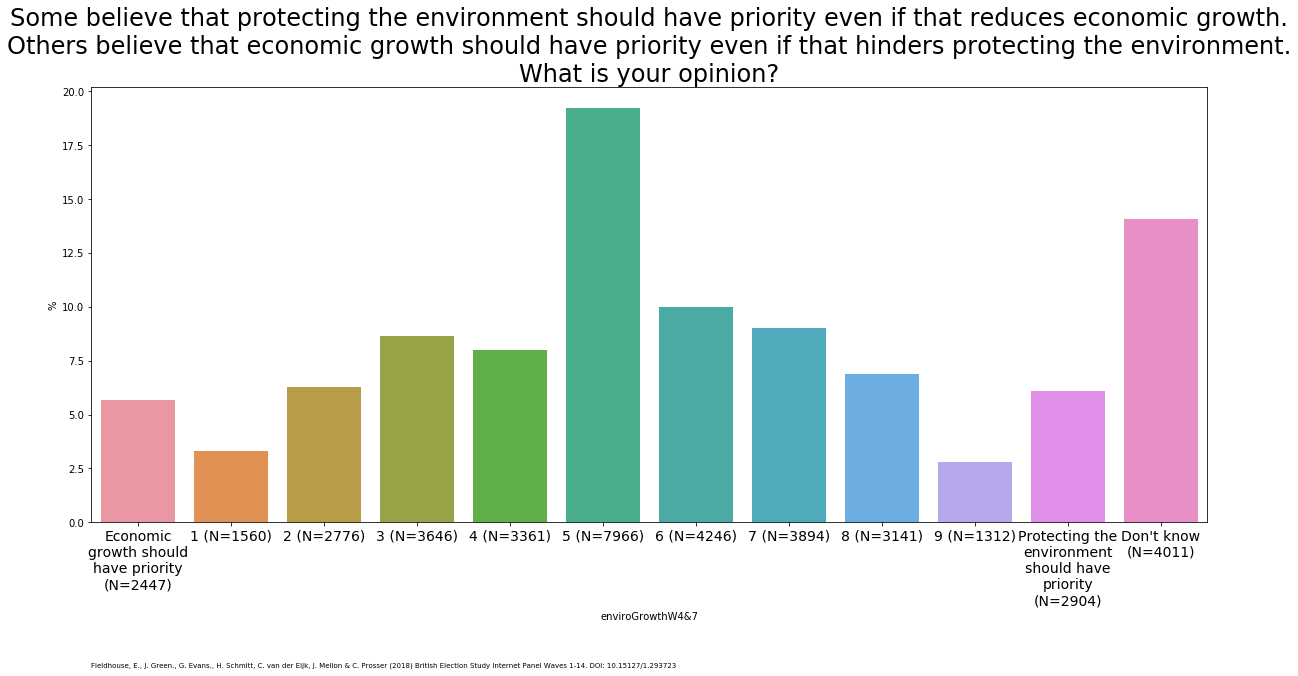

In [137]:
df2 = amalgamated_enviroGrowth
nice_bar_plot_one_var(df2, output_folder=output_subfolder,BES_Panel=BES_Panel,
              min_sample_size=1, normalize='all',drop_insig=False,
              text_width = 14,
              title_fontsize=24,
              title=enviroGrowth_text)

Warning, filename truncated because it was over 30. Filenames may no longer be unique


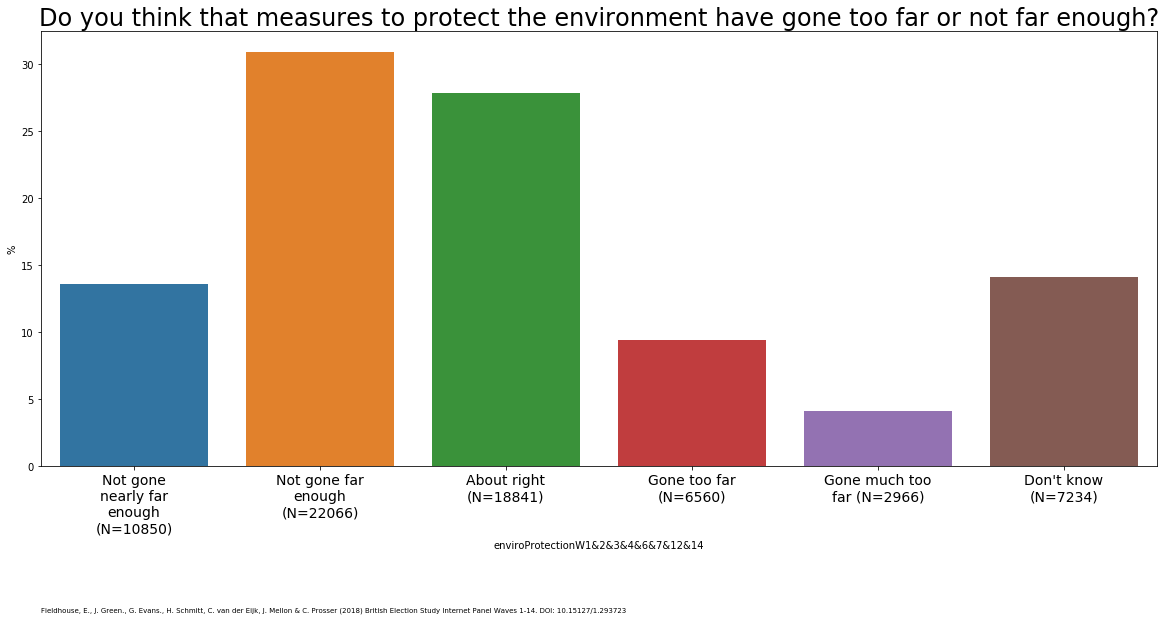

In [138]:
df2 = amalgamated_enviroProtection
nice_bar_plot_one_var(df2, output_folder=output_subfolder,BES_Panel=BES_Panel,
              min_sample_size=1, normalize='all',drop_insig=False,
              text_width = 14,
              title_fontsize=24,
              title=enviroProtection_text)

In [132]:
output_subfolder

'../BES_analysis_output/ClimateChange\\'

Warning, filename truncated because it was over 30. Filenames may no longer be unique


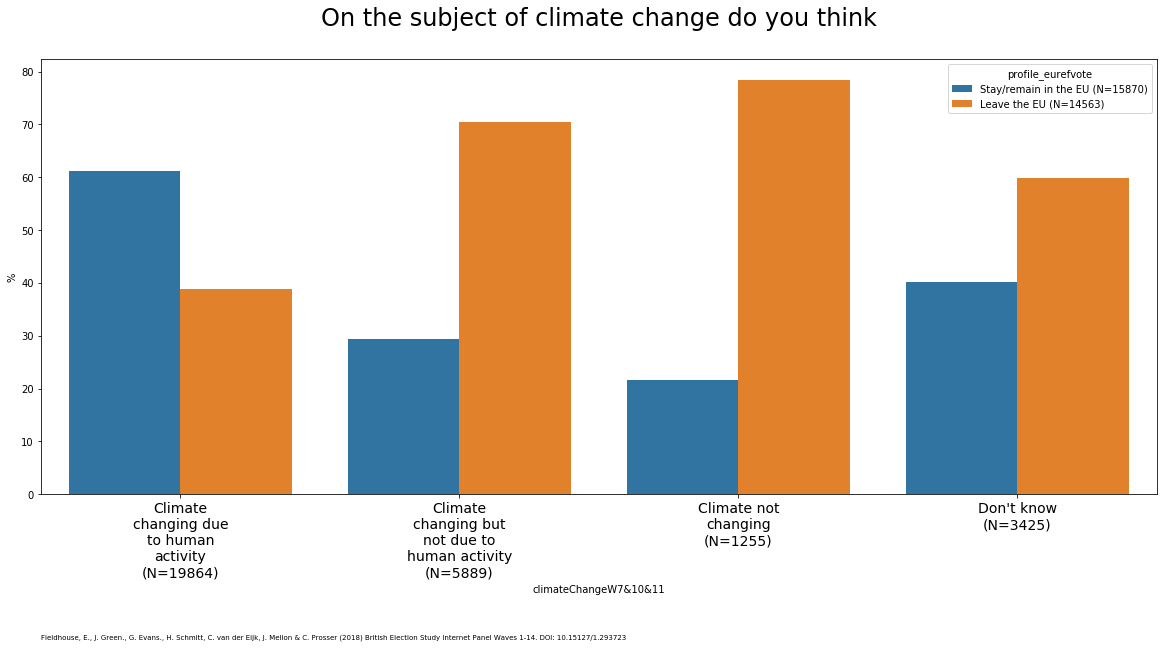

In [134]:
var2 ="climateChange"
var1 ="profile_eurefvote"

df1 = BES_Panel[var1].cat.remove_categories(["Don't know"])
df1.name = var1
df2 = amalgamated_climateChange

nice_bar_plot(df1, df2, output_folder=output_subfolder,BES_Panel=BES_Panel,
              min_sample_size=1, normalize='columns',drop_insig=False,
              text_width = 14,
              title_fontsize=24,
              title=climateChange_text)

Warning, filename truncated because it was over 30. Filenames may no longer be unique


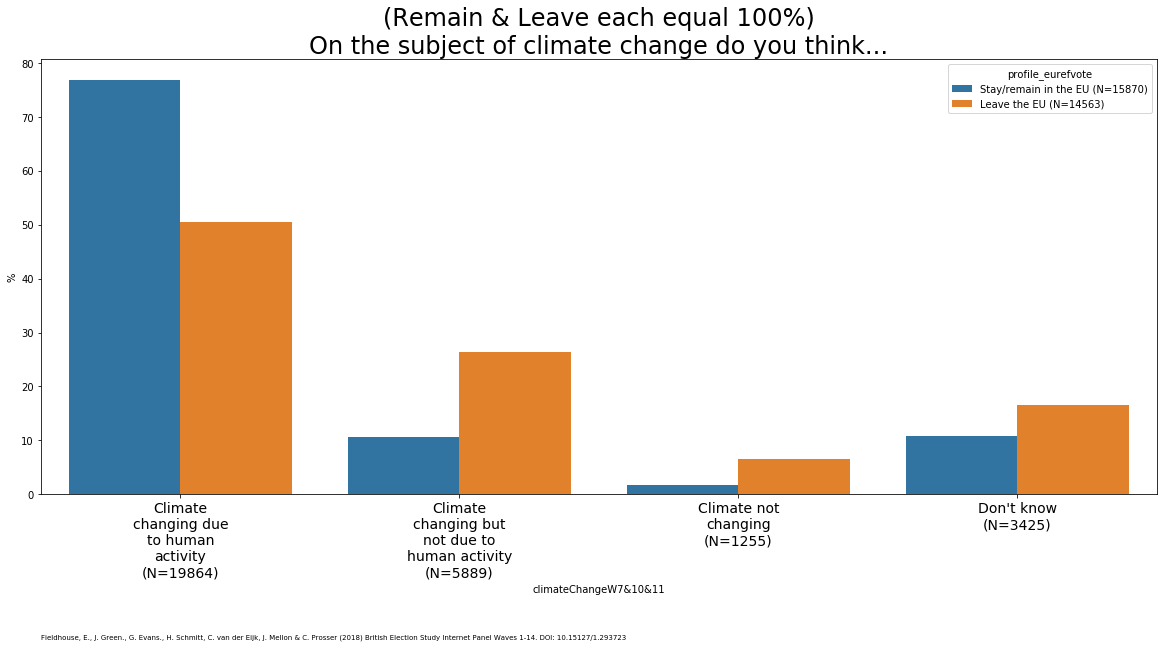

In [140]:
var2 ="climateChange"
var1 ="profile_eurefvote"


df1 = BES_Panel[var1].cat.remove_categories(["Don't know"])
df1.name = var1
df2 = amalgamated_climateChange


nice_bar_plot(df1, df2, output_folder=output_subfolder,BES_Panel=BES_Panel,
              min_sample_size=1, normalize='index',drop_insig=False,
              text_width = 14,
              title_fontsize=24,
              title="(Remain & Leave each equal 100%)\n"+climateChange_text)


Warning, filename truncated because it was over 30. Filenames may no longer be unique


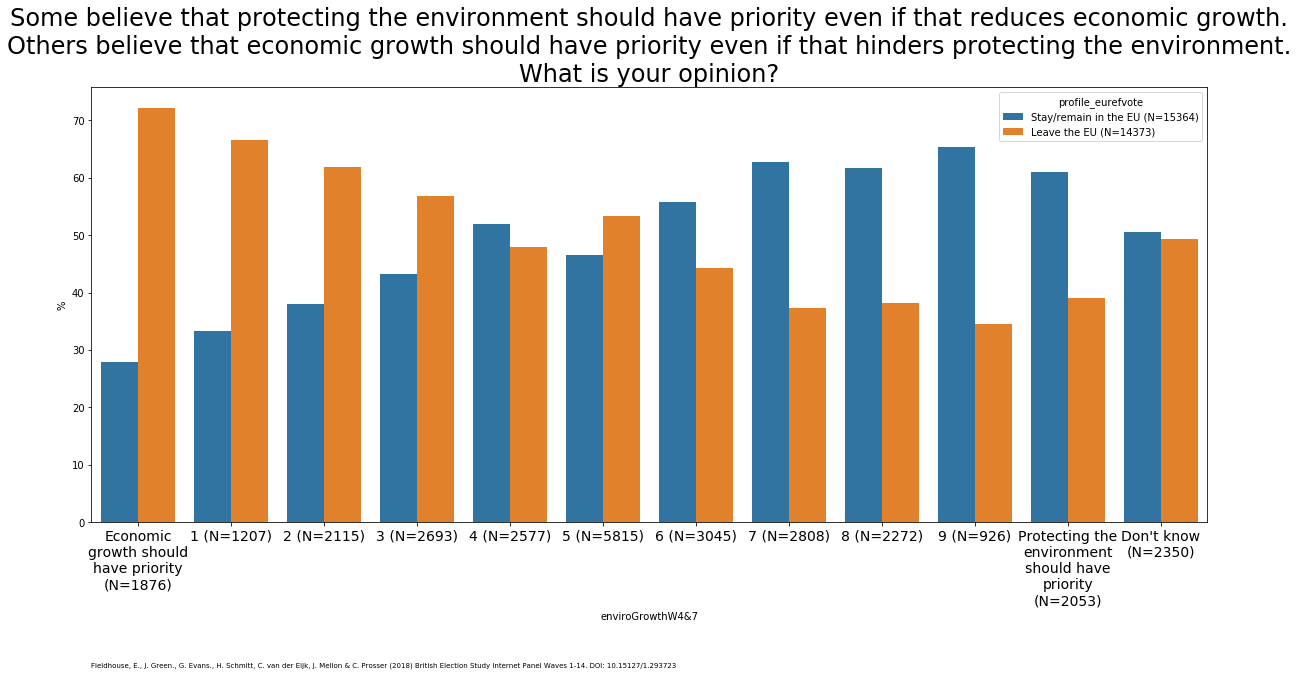

In [119]:
var2 ="enviroGrowth"
var1 ="profile_eurefvote"

df1 = BES_Panel[var1].cat.remove_categories(["Don't know"])
df1.name = var1
df2 = amalgamated_enviroGrowth

nice_bar_plot(df1, df2, output_folder=output_subfolder,BES_Panel=BES_Panel,
              min_sample_size=1, normalize='columns',drop_insig=False,
              text_width = 14,
              title_fontsize=24,
              title=enviroGrowth_text)

Warning, filename truncated because it was over 30. Filenames may no longer be unique


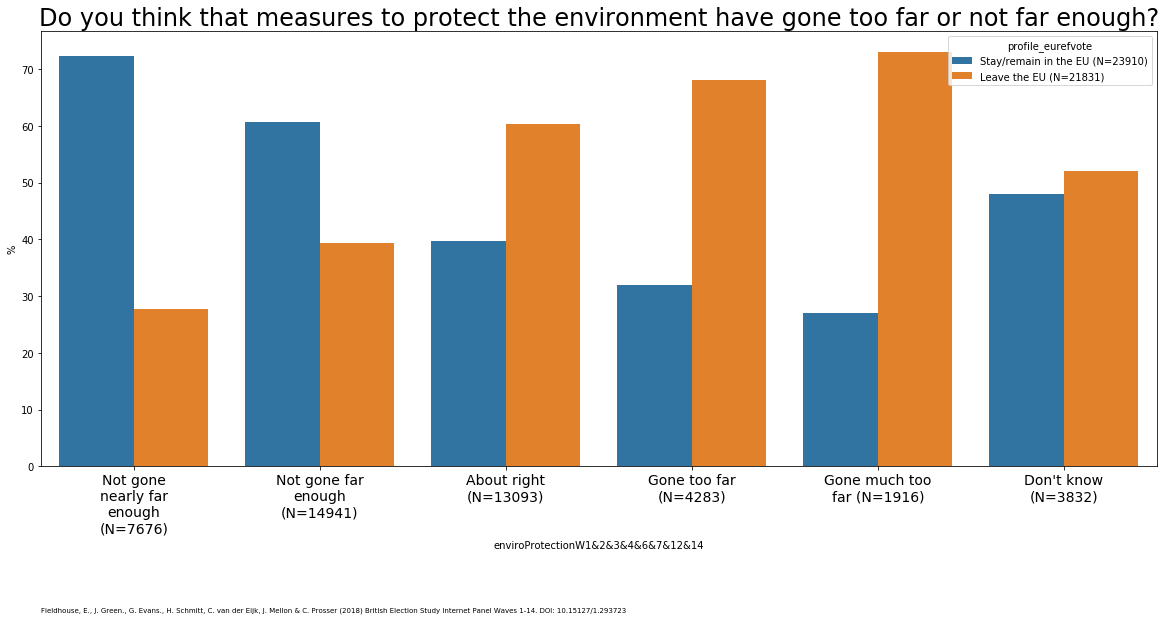

In [120]:
var2 ="enviroGrowth"
var1 ="profile_eurefvote"

df1 = BES_Panel[var1].cat.remove_categories(["Don't know"])
df1.name = var1
df2 = amalgamated_enviroProtection

nice_bar_plot(df1, df2, output_folder=output_subfolder,BES_Panel=BES_Panel,
              min_sample_size=1, normalize='columns',drop_insig=False,
              text_width = 14,
              title_fontsize=24,
              title=enviroProtection_text)

In [141]:
#######################################
# what's the breakdown across the Political Compass?

BES_decomp_save = pd.read_csv(BES_small_data_files + "pan_dataset_allr_values"+".csv")

granularity=201

xlim = ( 0, granularity-1 )
ylim = ( 0, granularity-1 )

x_axis = "Economic: Left("+str(xlim[0])+") <-> Right("+str(xlim[1])+")"
y_axis = "Social: Liberalism("+str(ylim[0])+") <-> Conservatism("+str(ylim[1])+")"

# ["Economic Left-Right","Socialism Liberalism-Conservatism"]

BES_decomp = BES_decomp_save[[x_axis+"{uniform}",y_axis+"{uniform}"]]
BES_decomp.columns = [x_axis,y_axis]



In [142]:
def centre_of_mass_marker(x,y, color, label=None):
    plt.plot(x.mean(),y.mean(),'rx')
    
def centre_of_mass_marker_free_colour(x,y, color, label=None):
    log_relative_sample_size = 3*(np.log10(len(x))- np.log10(df.shape[0]))
    plt.plot(x.mean(),y.mean(), color=color, marker ='x', label=label, markersize=20 + log_relative_sample_size)
#     raise Exception("lazy ass manual debugging")
    
    
def centre_of_mass(x,y, color, label=None):
    plt.annotate(str(wave_no),xy= (x.mean(),y.mean()))    
    
def plot_axes(x,y, color, label=None):
    plt.axhline(y=np.median( range(0,granularity) ), alpha=.2, linestyle='--',color='grey')
    plt.axvline(x=np.median( range(0,granularity) ), alpha=.2, linestyle='--',color='grey')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, alpha=.2, linestyle='--',color='grey')
    plt.plot([0, 1], [1, 0], transform=plt.gca().transAxes, alpha=.2, linestyle='--',color='grey')
    
wave_to_description = BES_file_manifest[ BES_file_manifest["Only_or_Combined"]=="Only" ].set_index("Wave No")["Friendlier_Description"]

In [144]:
levels = [2.6050499931125207e-05,
 2.9849531566339917e-05,
 3.310584238167089e-05,
 0.00012265443740417623]

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Wall time: 6min 4s


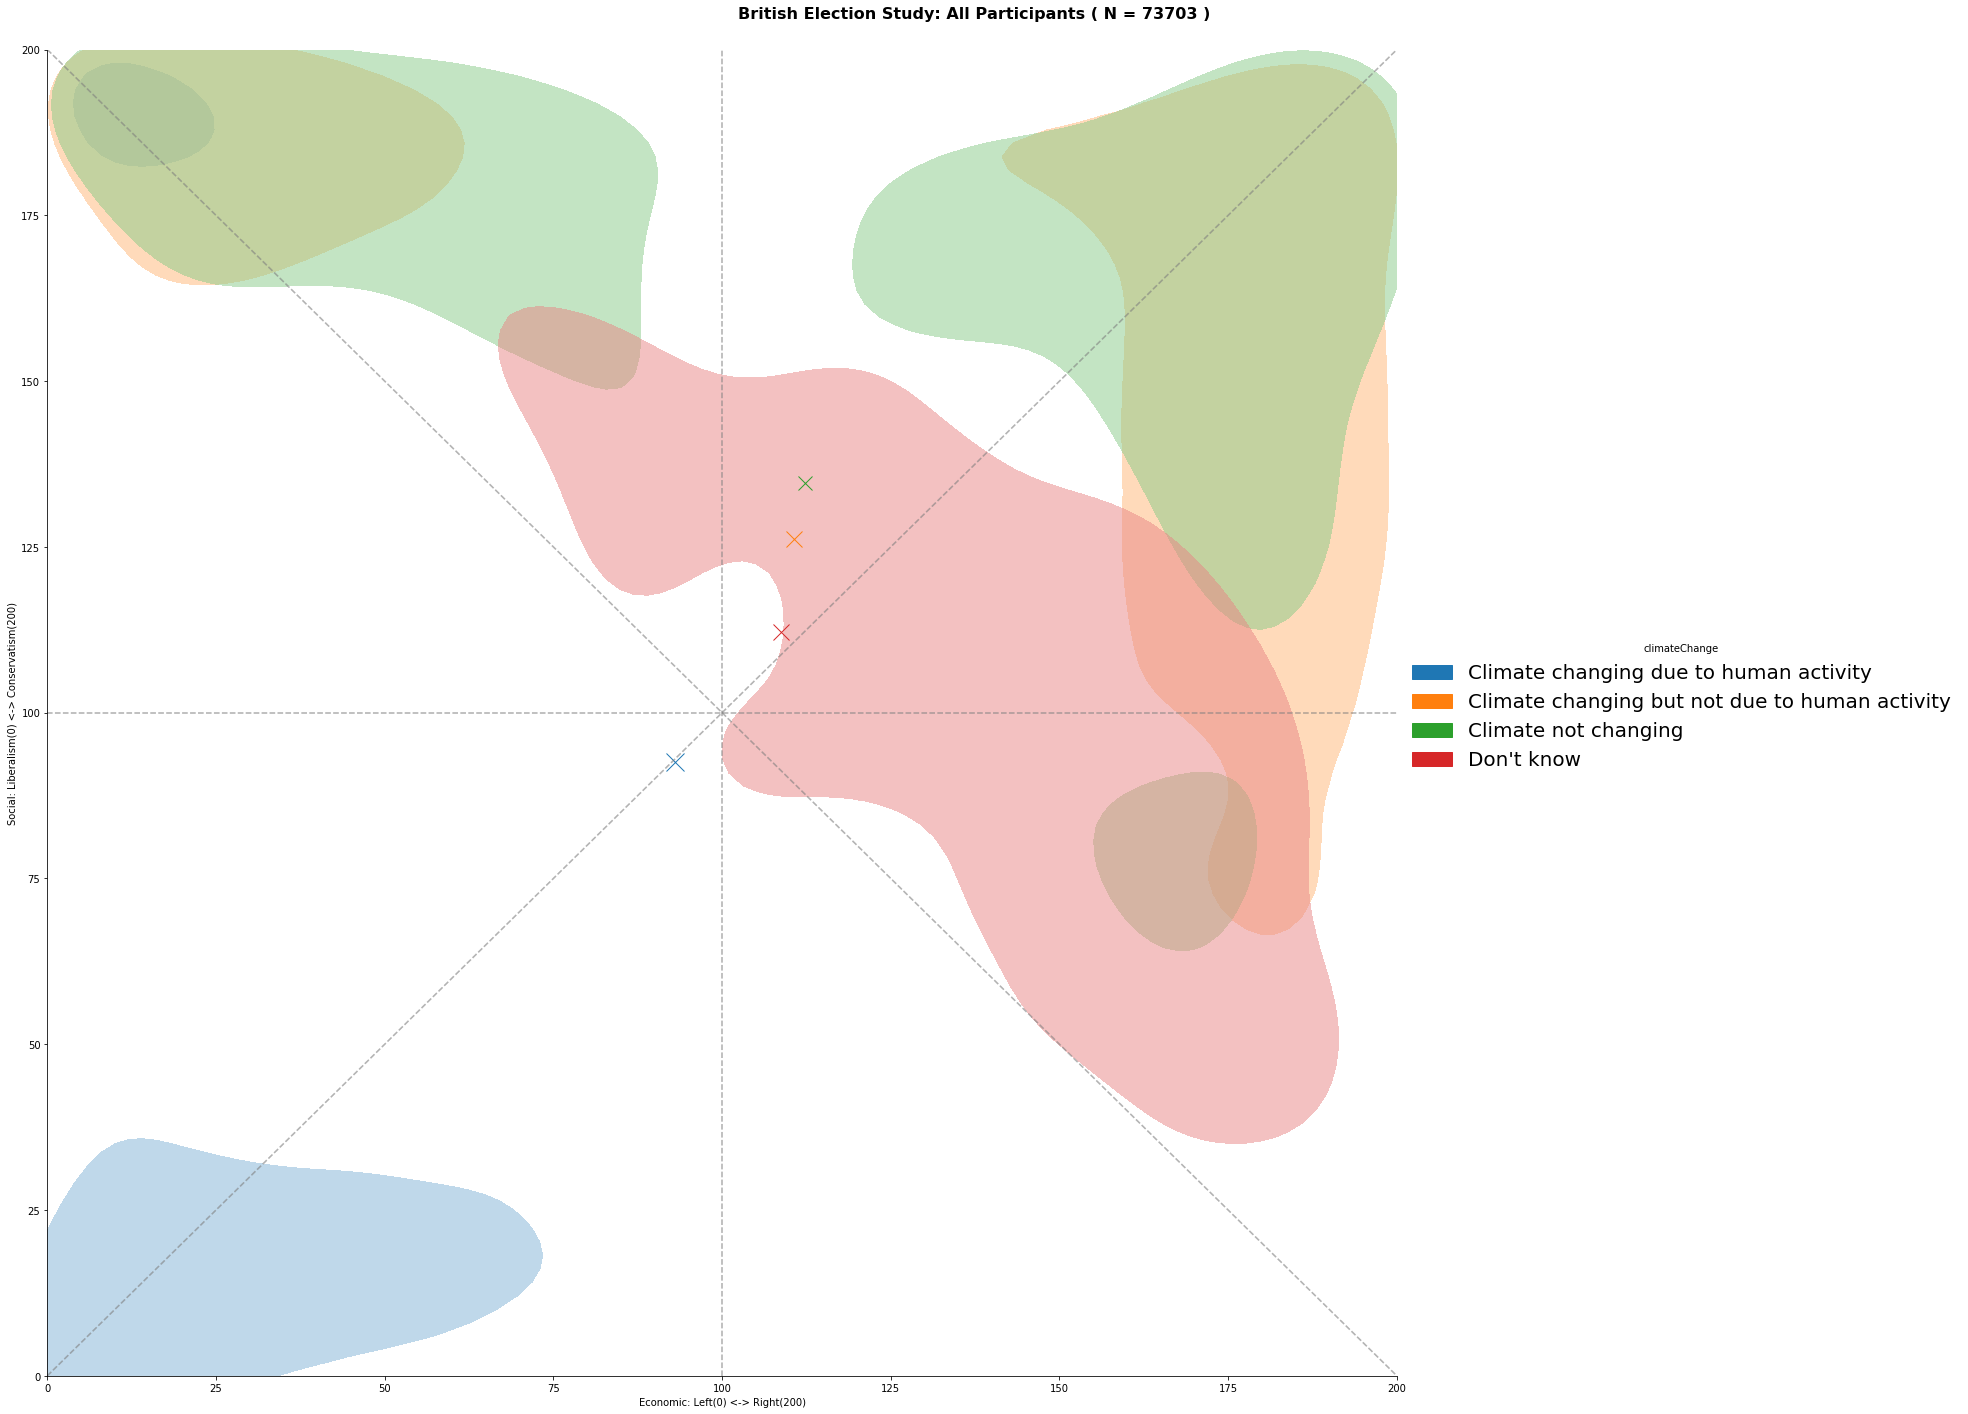

In [145]:
%%time
#######
### BASELINE CHART


df = BES_decomp.loc[ :,
                     [x_axis,y_axis] ].copy()

size=20

n_rows=1

title_manual = "British Election Study: All Participants ( N = "+str(df.shape[0])+" )"

# make the actual graphs
var1 = "climateChange"
df["dummy"] = df.notnull().any(axis=1)
df["climateChange"] = amalgamated_climateChange
g = sns.FacetGrid(df, height=size, col = "dummy", hue= var1, col_wrap=1, aspect=1 )
# if waves:
#     g.map(centre_of_mass,x_axis, y_axis)
g.map(centre_of_mass_marker_free_colour,x_axis, y_axis)
g.map(plot_axes,x_axis,y_axis)

g.map(sns.kdeplot, x_axis, y_axis, shade=True, shade_lowest=False,
      cut=0, levels=levels[1:], bw='scott', alpha=0.5).set_titles("" ).add_legend(fontsize=20)


plt.xlim(xlim)
plt.ylim(ylim)   


# labels and title
plt.subplots_adjust( top = 1-(.05  ) )
#     g.set_xlabels( comp_labels[x_axis] )
#     g.set_ylabels( comp_labels[y_axis] ) 
#     title = "Value Distribution of the Readership of UK Newspapers on the Political Compass"+\
#             "\n(Underlying Value Distribution of UK population ~ what you see for \"None\")"



if title_manual is None:
    title = col
else:
    title = title_manual

g.fig.suptitle(title, fontsize=16, fontweight='bold');

# save to file
# g.savefig(folder +os.sep+ "All Participants" +"_kde", bbox_inches='tight')
 

In [146]:
g.savefig(output_subfolder +os.sep+ "ClimateChange_by_PC" +"_kde", bbox_inches='tight')